In [1]:
import matplotlib.pyplot as plt
import matplotlib
import glob
import os
import pandas as pd
import seaborn as sns
import re
from scipy import stats
import numpy as np

In [2]:
matplotlib.rcParams['figure.figsize'] = [14, 8]

In [3]:
# Load data frame containing all the mutation information
complete_data = pd.read_csv("../Data/Structure_data/FH_complete_mutation_summary.csv")

In [4]:
# Load data frame containing FH mutation database
database_mutations = pd.read_csv("../Data/Mutations_database/FH_mutations_missense_categories.csv")

In [5]:
# Order frame by average mutational energy
average_sorted = complete_data.sort_values(by = "average_energy")
average_sorted = average_sorted.reset_index()
average_sorted["order"] = average_sorted.index

In [6]:
# merge frames to have mutations from the database included
average_merge = average_sorted.merge(database_mutations, left_on = "Mutation", right_on = "Mutation")

In [7]:
average_merge.head()

,index,Unnamed: 0_x,Residue,AAfrom,AAto,rhapsodyscore,rhapsodyclass,polyphenscore,polyphenclass,Foldx_energy,...,ClinVar ID,dbSNP ID,Origin,Segregation,Frequency,Re-site,VIP,Methylation,Owner,Category
0,4291,4291,274,A,V,0.553,neutral,0.515,deleterious,-0.532338,...,-,-,Germline,-,-,-,0,-,Jean-Pierre Bayley,PRED_LOF
1,6725,6725,402,H,Y,0.453,neutral,0.999,deleterious,-0.725123,...,-,-,Germline,-,-,-,0,-,Jean-Pierre Bayley,Unknown
2,5119,5119,318,H,L,0.939,deleterious,0.989,deleterious,1.330000,...,-,-,Germline,-,-,-,0,-,Jean-Pierre Bayley,Unknown
3,1042,1042,103,A,V,0.904,deleterious,0.999,deleterious,0.062707,...,-,-,CLASSIFICATION record,-,-,-,-,-,VKGL-NL,Unknown
4,4954,4954,309,P,S,0.818,deleterious,0.972,deleterious,1.299420,...,-,-,CLASSIFICATION record,-,-,-,0,-,VKGL-NL,Benign


In [8]:
# Get the known benign and LOF mutations from the database
average_merge_benign = average_merge[average_merge["Category"] == "Benign"]
average_merge_LOF = average_merge[average_merge["Category"] == "LOF"]

In [9]:
# Exclude the binding site and hinge mutations
average_merge_LOF = average_merge_LOF[average_merge_LOF["Mindist_bindingsiteA"] >= 6]
average_merge_LOF = average_merge_LOF[average_merge_LOF["Mindist_hinge"] >= 6]

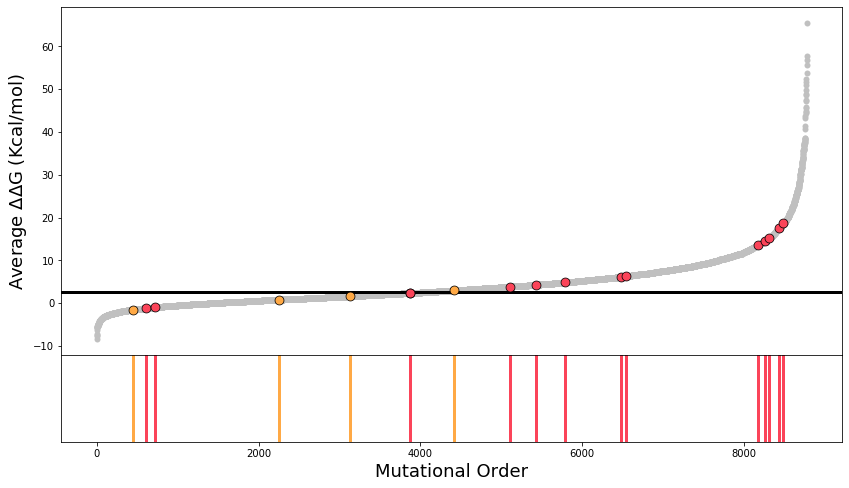

In [10]:
# Plot the average mutations in rank order, then overlay the known benign and LoF mutations in their appropriate rank
f, (ax_top, ax_bottom) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.8,.2)})
f.subplots_adjust(hspace = 0)

sns.scatterplot(average_sorted.index, average_sorted["average_energy"], ax = ax_top, linewidth = 0, color = "#C0C0C0")
sns.scatterplot(average_merge_benign["order"], average_merge_benign["average_energy"],ax = ax_top, color = "#FFA945", s = 80, zorder = 2, edgecolor = "k")
sns.scatterplot(average_merge_LOF["order"], average_merge_LOF["average_energy"], ax =ax_top, color = "#FB4459", s = 80, zorder = 2, edgecolor = "k")
ax_top.axhline(2.5, c = "k", lw = 3, zorder = 1)
ax_top.set_ylabel("Average $\Delta \Delta$G (Kcal/mol)", size = 18)
plt.xlabel("Mutational Order", size = 18)

ax_bottom.set_yticks([])

# Add lines to the bottom axis - makes it easier to see the spread of mutations
for row,values in average_merge_benign.iterrows():
    ranking =(values["order"])
    ax_bottom.axvline(ranking, c ="#FFA945", lw = 3)
    
for row,values in average_merge_LOF.iterrows():
    ranking =(values["order"])
    ax_bottom.axvline(ranking, c ="#FB4459", lw = 3)
plt.savefig("Figure_4_B_averageenergyranking.png", dpi = 400)